In [88]:
import pandas as pd
import numpy as np
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle
import pandas as p

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [89]:
x_train_tf = np.load('feature_extraction/X_train_tf.npy', allow_pickle=True)
x_test_tf = np.load('feature_extraction/X_test_tf.npy', allow_pickle=True)


y_train = np.load('feature_extraction/y_train.npy', allow_pickle=True)
y_test = np.load('feature_extraction/y_test.npy', allow_pickle=True)

In [90]:
x_train=x_train_tf[0]
x_test=x_test_tf[0]

In [91]:
metrics_data = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

In [92]:

models = [
#    RandomForestClassifier(random_state=42),
    RandomForestClassifier(random_state=42, n_estimators=500, max_features='log2', max_depth=None, criterion='entropy'),
    LogisticRegression(random_state=42, max_iter=1000, C=30, solver='newton-cg'),
 #   DecisionTreeClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42, max_depth=120, criterion='gini', min_samples_split=5, min_samples_leaf=1),
    MultinomialNB(alpha=0.08),
    SVC(random_state=42),
    GradientBoostingClassifier(random_state=42, n_estimators=200, learning_rate=0.1),
    KNeighborsClassifier(n_neighbors=6, weights='distance')
]


# Define the model names
model_names = ["RF", "LR", "DT", "NB", "SVC", "GB", "KNN"]



# Iterate over models, x_data, and ngram_ranges
for model, model_name in zip(models, model_names):

    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict on the test data
    y_pred = model.predict(x_test)

    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the metrics to the data dictionary
    metrics_data["Model"].append(model_name)
    metrics_data["Accuracy"].append(acc)
    metrics_data["Precision"].append(precision)
    metrics_data["Recall"].append(recall)
    metrics_data["F1 Score"].append(f1)

    # Print evaluation metrics
    print(f"Metrics for {model_name}:")
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()

    # Save the model to a file
    filename = f"{model_name}.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

Metrics for RF:
Accuracy: 0.9321525067547283
Precision: 0.9132302405498282
Recall: 0.8947811447811448
F1 Score: 0.9039115646258503

Metrics for LR:
Accuracy: 0.925547883518463
Precision: 0.8962900505902193
Recall: 0.8947811447811448
F1 Score: 0.8955349620893007

Metrics for DT:
Accuracy: 0.8462924046832783
Precision: 0.7779605263157895
Recall: 0.7962962962962963
F1 Score: 0.7870216306156406

Metrics for NB:
Accuracy: 0.9135394776343441
Precision: 0.9158964879852126
Recall: 0.8341750841750841
F1 Score: 0.8731277533039647

Metrics for SVC:
Accuracy: 0.9381567096967878
Precision: 0.9078073089700996
Recall: 0.92003367003367
F1 Score: 0.9138795986622072

Metrics for GB:
Accuracy: 0.8823176223356349
Precision: 0.8442906574394463
Recall: 0.8215488215488216
F1 Score: 0.832764505119454

Metrics for KNN:
Accuracy: 0.9081356949864905
Precision: 0.9045871559633027
Recall: 0.82996632996633
F1 Score: 0.8656716417910447



In [93]:
import matplotlib.pyplot as plt

# Define the model names and accuracy scores
metric_data=metrics_data.copy()
model_names = ["RF", "LR", "DT", "NB", "SVC", "GB", "KNN", "LSTM"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]


accuracy_scores = metric_data["Accuracy"]
# Add LSTM metrics to the data dictionary
lstm_metrics = {
    "Accuracy": 0.9150405283698589,
    "Precision": 0.8724279835390947,
    "Recall": 0.8922558922558923,
    "F1 Score": 0.8822305451518936
}

for metric in metrics:
    metric_data[metric].append(lstm_metrics[metric])



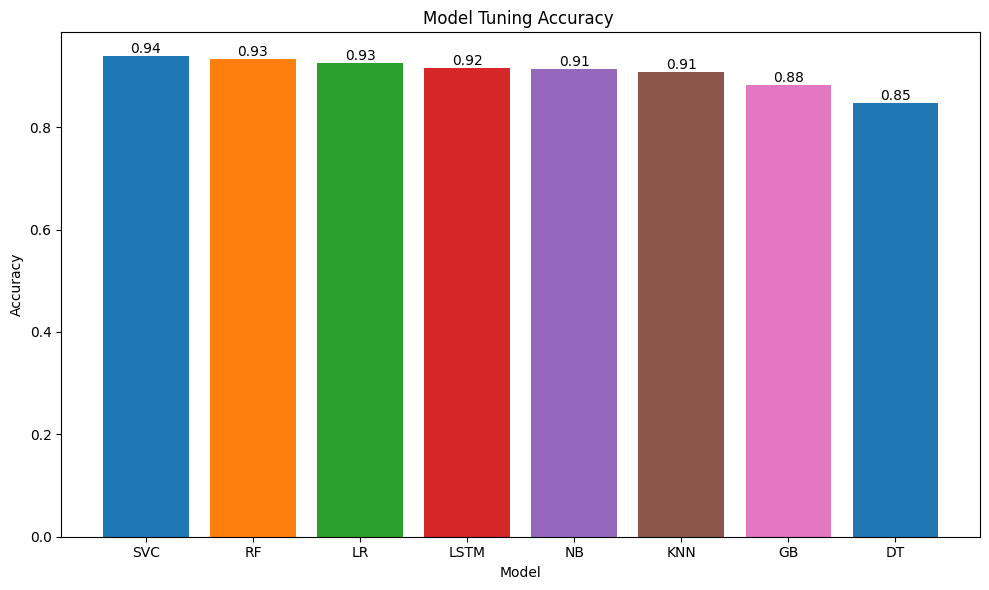

In [95]:
# Define the colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Sort the model names and accuracy scores
sorted_scores = sorted(zip(model_names, accuracy_scores), key=lambda x: x[1], reverse=True)

x, y = zip(*sorted_scores)  # Unpack a list of pairs into two tuples

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(x, y, color=colors)

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Tuning Accuracy ")

# Add the accuracy values on top of each bar
for i, v in enumerate(y):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()



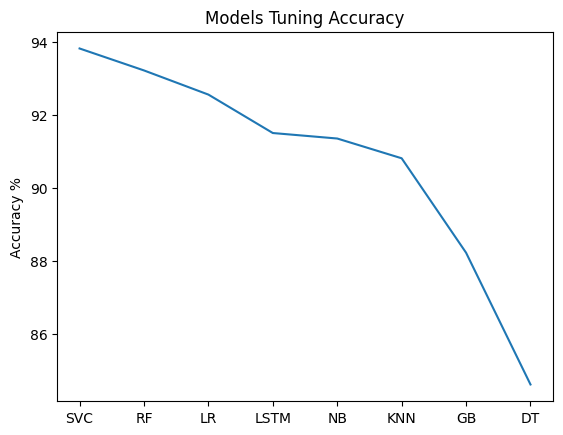

In [99]:
x, y = zip(*sorted_scores)  # Unpack a list of pairs into two tuples

z = [score*100 for score in y]  # Scale the scores to percentages

plt.plot(x, z)
plt.title('Models Tuning Accuracy')
plt.ylabel('Accuracy %')
plt.show()

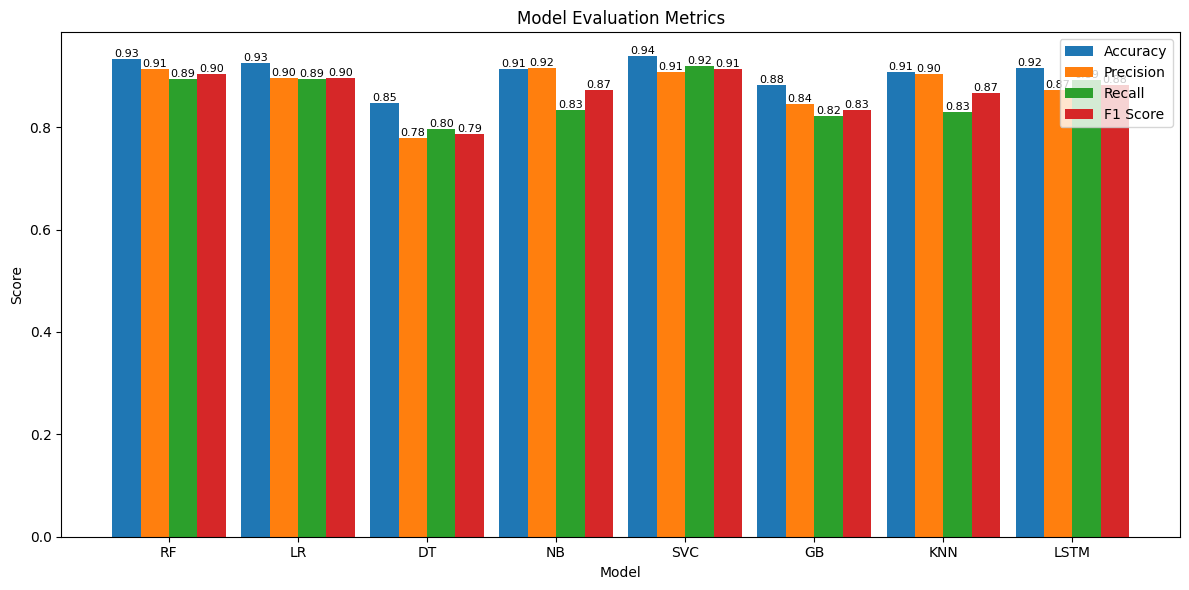

In [100]:

# Set the position of each bar on the x-axis
bar_positions = np.arange(len(model_names))

# Set the width of each bar
bar_width = 0.22

# Set the color for each metric
# colors = ['b', 'g', 'r', 'c']
# Set the color for each metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


# Create the bar chart for each metric
fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    bars = ax.bar(bar_positions + (i * bar_width), metric_data[metric], bar_width, color=colors[i])

# Set the labels, title, and legend
ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.set_title("Model Evaluation Metrics")
ax.set_xticks(bar_positions + (bar_width * (len(metrics) - 1) / 2))
ax.set_xticklabels(model_names)
ax.legend(metrics)

# Add the metric values on top of each bar
for metric in metrics:
    for i, score in enumerate(metric_data[metric]):
        ax.text(bar_positions[i] + (metrics.index(metric) * bar_width), score, f"{score:.2f}", ha='center', va='bottom',fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# pip install openpyxl

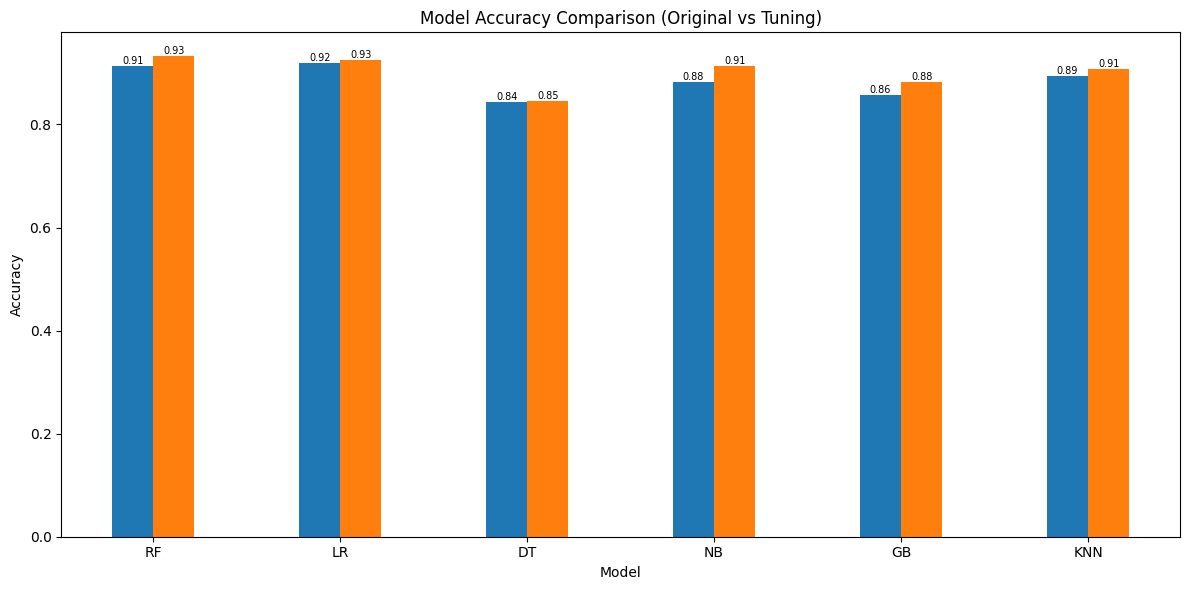

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file
df = pd.read_excel("tuning_evaluation_2.xlsx", engine="openpyxl")

# Extract the relevant columns
model_names = df["Model"].tolist()
accuracy_original = df["Accuracy"].tolist()
accuracy_tuning = df["Accuracy Tuning"].tolist()

# Set the position of each bar on the x-axis
bar_positions = range(len(model_names))

# Set the width of each bar
bar_width = 0.22

# Set the colors for the original and tuned bars
color_original = '#1f77b4'  # Color for original model
color_tuning = '#ff7f0e'  # Color for tuned model

# Create the bar chart for accuracy
fig, ax = plt.subplots(figsize=(12, 6))
bars_original = ax.bar(bar_positions, accuracy_original, bar_width, color=color_original)
bars_tuning = ax.bar([p + bar_width for p in bar_positions], accuracy_tuning, bar_width, color=color_tuning)

# Set the labels, title, and legend
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.set_title("Model Accuracy Comparison (Original vs Tuning)")
ax.set_xticks([p + bar_width / 2 for p in bar_positions])
ax.set_xticklabels(model_names)

# Add the accuracy values on top of each bar with adjusted font size
for bars in [bars_original, bars_tuning]:
    for bar in bars:
        score = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, score, f"{score:.2f}", ha='center', va='bottom', fontsize=7)

# Show the plot
plt.tight_layout()
plt.show()



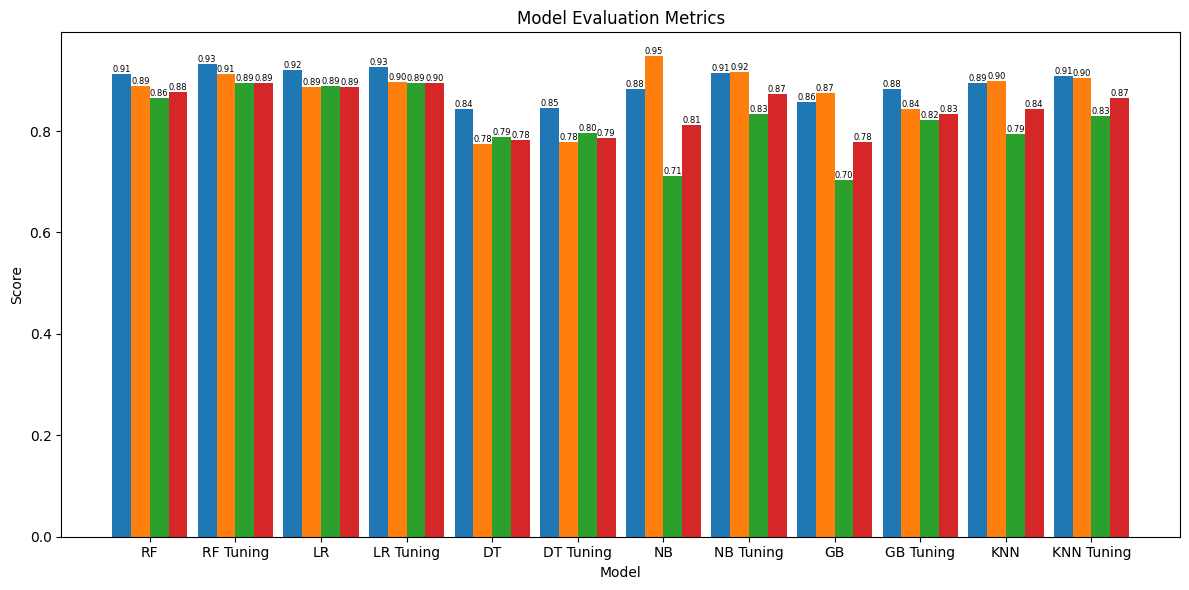

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file
df = pd.read_excel("tuning_evaluation.xlsx", engine="openpyxl")

# Extract the relevant columns
model_names = df["Model"].tolist()
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
metrics_data = {metric: df[metric].tolist() for metric in metrics}

# Set the position of each bar on the x-axis
bar_positions = range(len(model_names))

# Set the width of each bar
bar_width = 0.22

# Set the color for each metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create the bar chart for each metric
fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    bars = ax.bar([p + (i * bar_width) for p in bar_positions], metrics_data[metric], bar_width, color=colors[i])

# Set the labels, title, and legend
ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.set_title("Model Evaluation Metrics")
ax.set_xticks([p + (bar_width * (len(metrics) - 1) / 2) for p in bar_positions])
ax.set_xticklabels(model_names)

# Add the metric values on top of each bar with adjusted font size
for i, metric in enumerate(metrics):
    for j, score in enumerate(metrics_data[metric]):
        ax.text(j + (i * bar_width), score, f"{score:.2f}", ha='center', va='bottom', fontsize=6)

# Show the plot
plt.tight_layout()
plt.show()


In [105]:
# Save the metrics to a file or data structure

df_metrics = pd.DataFrame(metrics_data)
df_metrics.to_csv("metrics_tuning_2.csv", index=False)